In [ ]:
import os
import zipfile

# zip_ref = zipfile.ZipFile('Recyclass/Machine Learning/Dataset.zip', 'r')
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/SampahKu/Dataset/Dataset.zip', 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

# base_dir = 'tmp/Dataset'
base_dir = 'tmp/DATASET'

In [ ]:
from pathlib import Path
import imghdr

In [ ]:
train_dir = os.path.join(base_dir, 'TRAIN')
test_dir = os.path.join(base_dir, 'TEST')

In [ ]:
o_train_dir = os.path.join(train_dir, 'O')
r_train_dir = os.path.join(train_dir, 'R')

In [ ]:
o_test_dir = os.path.join(test_dir, 'O')
r_test_dir = os.path.join(test_dir, 'R')

In [ ]:
print('total training Organik images:', len(os.listdir(o_train_dir)))
print('total training Anorganik images:', len(os.listdir(r_train_dir)))

total training Organik images: 12565
total training Anorganik images: 9999


In [ ]:
print('total testing Organik images:', len(os.listdir(o_test_dir)))
print('total testing Anorganik images:', len(os.listdir(r_test_dir)))

total testing Organik images: 1401
total testing Anorganik images: 1112


In [ ]:
o_train_files = os.listdir(o_train_dir)
print(o_train_files[:10])

r_train_files = os.listdir(r_train_dir)
print(r_train_files[:10])

['O_5898.jpg', 'O_5564.jpg', 'O_8042.jpg', 'O_1464.jpg', 'O_10376.jpg', 'O_4068.jpg', 'O_7673.jpg', 'O_216.jpg', 'O_7536.jpg', 'O_10497.jpg']
['R_174.jpg', 'R_8472.jpg', 'R_2866.jpg', 'R_9099.jpg', 'R_6025.jpg', 'R_8527.jpg', 'R_6125.jpg', 'R_7177.jpg', 'R_3726.jpg', 'R_7564.jpg']


In [ ]:
o_test_files = os.listdir(o_test_dir)
print(o_test_files[:10])

r_test_files = os.listdir(r_test_dir)
print(r_test_files[:10])

['O_12706.jpg', 'O_13227.jpg', 'O_13570.jpg', 'O_13306.jpg', 'O_13281.jpg', 'O_13848.jpg', 'O_12947.jpg', 'O_13765.jpg', 'O_13386.jpg', 'O_13551.jpg']
['R_10410.jpg', 'R_10920.jpg', 'R_10559.jpg', 'R_10463.jpg', 'R_10297.jpg', 'R_10398.jpg', 'R_10007.jpg', 'R_10166.jpg', 'R_10909.jpg', 'R_10019.jpg']


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
base_datagen = ImageDataGenerator(
    rescale=1./255.,
    horizontal_flip=True)

In [ ]:
train_generator = base_datagen.flow_from_directory(
        train_dir,
        target_size = (150, 150),
        batch_size=32,
        class_mode = 'binary')

test_generator = base_datagen.flow_from_directory(
        test_dir,
        target_size = (150, 150),
        batch_size=32,
        class_mode = 'binary')

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(512, (3, 3), activation = 'relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 5, 5, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,638,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,207,233 (12.23 MB)

 Trainable params: 3,207,233 (12.23 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.85 and logs.get('val_accuracy') > 0.85):
            print('\nTraining & validation accuracy are higher than 0.85 so cancelling training!')
            self.model.stop_training = True

callbacks = myCallback()

In [ ]:
history = model.fit(
      train_generator,
      epochs=20,
      validation_data=test_generator,
      steps_per_epoch=25,
      validation_steps=5,
      verbose=2,
      callbacks=[callbacks])

Epoch 1/20
25/25 - 45s - 2s/step - accuracy: 0.8363 - loss: 0.3994 - val_accuracy: 0.8938 - val_loss: 0.2848
Epoch 2/20
25/25 - 44s - 2s/step - accuracy: 0.8175 - loss: 0.3985 - val_accuracy: 0.8875 - val_loss: 0.3159
Epoch 3/20

Training & validation accuracy are higher than 0.85 so cancelling training!
25/25 - 45s - 2s/step - accuracy: 0.8537 - loss: 0.3834 - val_accuracy: 0.8875 - val_loss: 0.2742


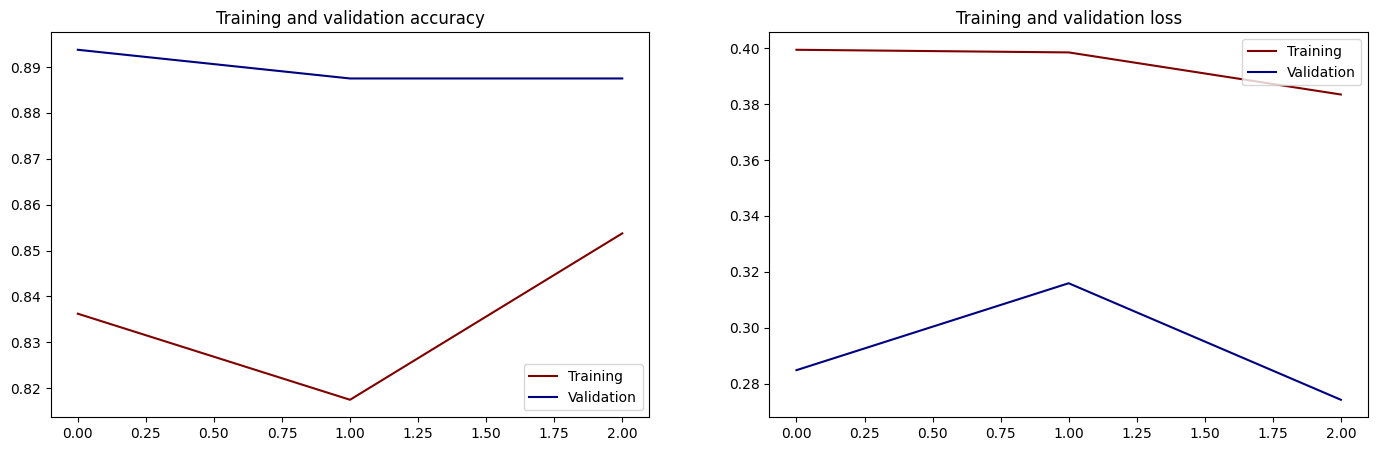

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_acc = range(len(acc))
epochs_loss = range(len(loss))

fig, (acc_fig, loss_fig) = plt.subplots(1, 2, figsize=(17, 5))

acc_fig.plot(epochs_acc, acc, '#800000', label='Training accuracy')
acc_fig.plot(epochs_acc, val_acc, '#000080', label='Validation accuracy')
acc_fig.set_title('Training and validation accuracy')
acc_fig.legend(["Training", "Validation"], loc ="lower right")

loss_fig.plot(epochs_loss, loss, '#800000', label='Training loss')
loss_fig.plot(epochs_loss, val_loss, '#000080', label='Validation loss')
loss_fig.set_title('Training and validation loss')
loss_fig.legend(["Training", "Validation"], loc ="upper right")

plt.show()

Saving download (7).jpg to download (7) (3).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
download (7) (3).jpg
Probabilitas Anorganik: 0.00000
Prediksi: Organik


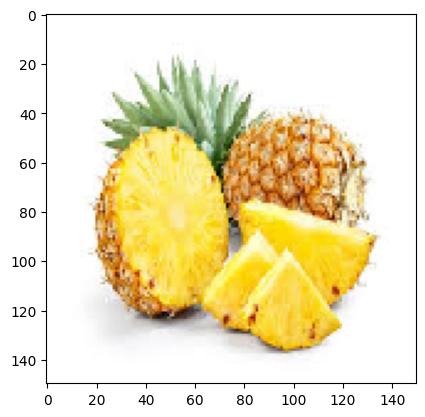

In [38]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)
  imgplot = plt.imshow(img)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=8)
  print(fn)

  # Tampilkan hasil prediksi (klasifikasi biner sigmoid)
  # classes[0] adalah probabilitas untuk kelas positif (misalnya organik)
  print('Probabilitas Anorganik: {:.5f}'.format(classes[0][0]))

  # Jika probabilitas di atas 0.5, gambar diklasifikasikan sebagai organik
  if classes[0][0] > 0.5:
    print("Prediksi: Anorganik")
  else:
    print("Prediksi: Organik")